In [1]:
from key import API_KEY
import requests
import pandas as pd
print(API_KEY)

xISm2VSafEPvBssG1fhbeAP8htfLYhdQ


In [2]:
ticker = "AAPL"
multiplier = 1
timespan = "day"
start_date = "2024-09-01"
end_date = "2024-09-22"

url = f"https://api.polygon.io/v2/aggs/ticker/{ticker}/range/{multiplier}/{timespan}/{start_date}/{end_date}?apiKey={API_KEY}"

# print(url)

response = requests.get(url)
data = response.json()

if "results" in data:
    df_stock = pd.DataFrame(data["results"])

    df_stock['t'] = pd.to_datetime(df_stock['t'], unit='ms')

    df_stock.rename(columns={'t': 'Date', 'o': 'Open', 'h': 'High', 'l': 'Low', 'c': 'Close', 'v': 'Volume'}, inplace=True)
else:
    print("Error fetching stock data:", data)

In [3]:
news_url = f"https://api.polygon.io/v2/reference/news?ticker={ticker}&published_utc.gte=2024-09-20&published_utc.lte=2024-09-27&apiKey={API_KEY}"
news_response = requests.get(news_url)
news_data = news_response.json()

df_news = pd.DataFrame(news_data['results'])

df_news['published_utc'] = pd.to_datetime(df_news['published_utc'])

df_news = df_news[['published_utc', 'title']]

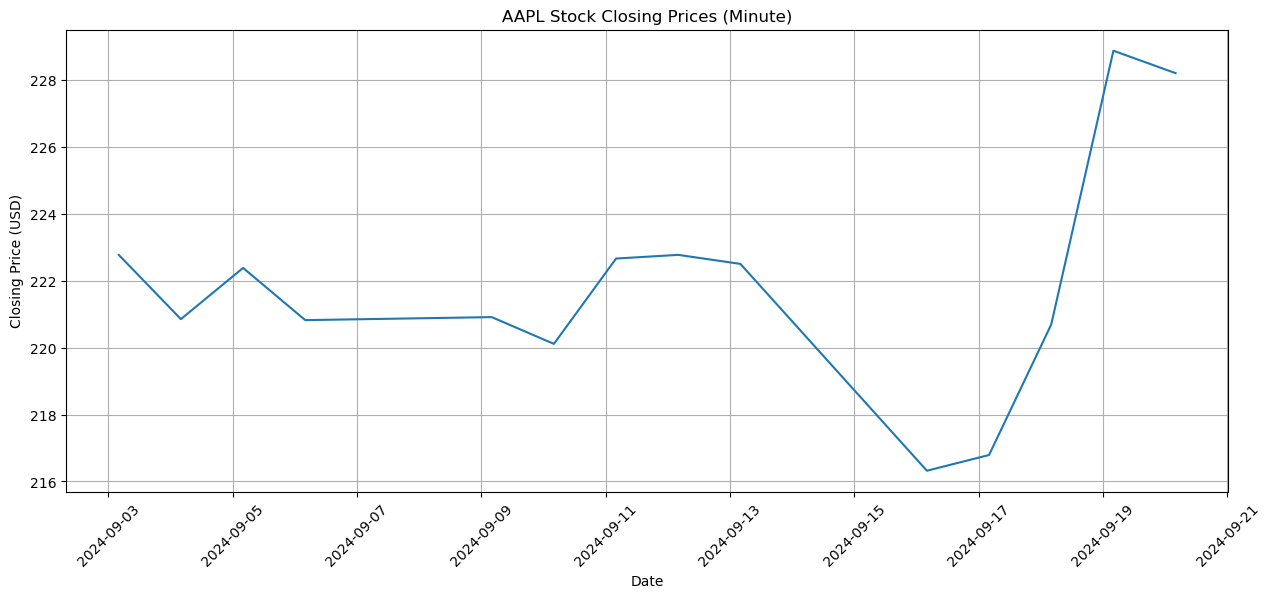

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,6))
plt.plot(df_stock['Date'], df_stock['Close'])
plt.title(f"{ticker} Stock Closing Prices (Minute)")
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.xticks(rotation=45)
plt.grid(True)

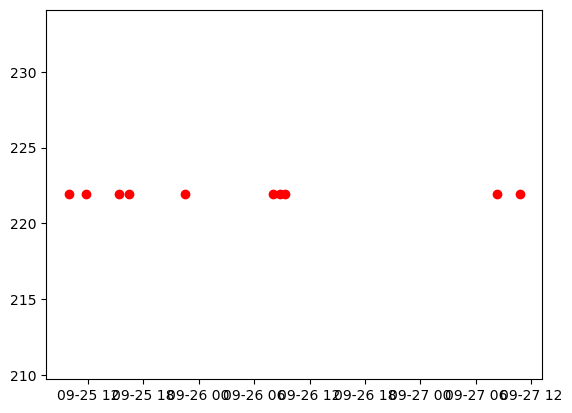

In [5]:
plt.scatter(df_news['published_utc'], [df_stock['Close'].mean()] * len(df_news), color = 'r', marker = 'o', label="News Articles", zorder = 5)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


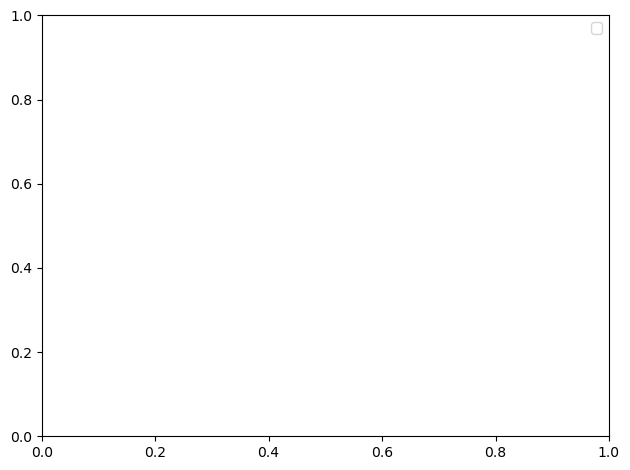

In [6]:
for i, row in df_news.iterrows():
    plt.annotate(row['title'], (row['published_utc'], df_stock['Close'].mean()), rotation = 45, fontsize = 8)
    
plt.legend()

plt.tight_layout()
plt.show()